In [7]:
# from phase import extract_phase

In [186]:
def create_new_phase(case, tsimu, PRE=False, ADDITIVE=False, phase_old=None):
    case.phase = {"t":[], "idx":[], "idx_theo":[], "eta":[]}
    # Stationary waves. All the same phase.
    if PRE == True:
        interface = Interface2D(L0 = case.L0, N = case.N, 
                                path = case.path, t=None, PRUNING=True, filename=case.path+'eta/eta_pre') 
        for (j,t) in enumerate(tsimu):
            case.phase['t'].append(t-case.tstart)
            case.phase['idx'].append(0)  
            case.phase['eta'].append(interface.eta)  
    # Moving waves. Read phase from interface file.
    else:      
        if ADDITIVE == True: 
            #If additively adding time
            t_old = np.array(phase_old['t'])
            for (j,t) in tqdm(enumerate(tsimu)):
                case.phase['t'].append(t-case.tstart)
                i = np.where(np.isclose(t_old, t-case.tstart))[0]
                print(i)
                if len(i) != 0:
                    print('Reuse %g' %(t_old[i[0]]+case.tstart))
                    case.phase['idx'].append(phase_old['idx'][i[0]])
                    case.phase['idx_theo'].append(phase_old['idx_theo'][i[0]])
                    case.phase['eta'].append(phase_old['eta'][i[0]])
                else:
                    print ('Additional t = %g' %t)
                    interface = Interface2D(L0 = case.L0, N = case.N, 
                                            path = case.path, pre='eta/eta_loc_t', t = t, PRUNING=True)    
                    # TODO: append other field in interface too
                    case.phase['idx'].append(interface.idx)
                    idx_theo = int(round(case.wave.c*(t-case.tstart)/(2*np.pi/case.k)*int(case.N/case.k)) % int(case.N/case.k))
                    case.phase['idx_theo'].append(idx_theo)
                    case.phase['eta'].append(interface.eta) 
        else: 
            # If creating from scratch 
            for (j,t) in tqdm(enumerate(tsimu)):
                case.phase['t'].append(t-case.tstart)
                interface = Interface2D(L0 = case.L0, N = case.N, 
                                        path = case.path, pre='eta/eta_loc_t', t = t, PRUNING=True)    
                case.phase['idx'].append(interface.idx)
                idx_theo = int(round(case.wave.c*(t-case.tstart)/(2*np.pi/case.k)*int(case.N/case.k)) % int(case.N/case.k))
                case.phase['idx_theo'].append(idx_theo)
                case.phase['eta'].append(interface.eta)
            
    # Save the new phase dictionary
    picklename = case.path + 'eta/' + 'phase_info' +'.pkl'
    save_object(case.phase, picklename)

def extract_phase (case, tsimu, PRE=False):      
    picklename = case.path + 'eta/' + 'phase_info' +'.pkl'
    exists = os.path.exists(picklename)
    # If the pickle is there read in the pickles, and check that time array agrees.
    if exists:
        case.phase = load_object(picklename)
        print('pickle restored!')
        if len(np.array(case.phase['t'])) != len(tsimu):
            print('But not the same time array!')
            phase_old = case.phase.copy()
            create_new_phase (case, tsimu, PRE=PRE, ADDITIVE=True, phase_old=phase_old)
    # Else initiate the array from scratch 
    else:
        create_new_phase (case, tsimu, PRE=PRE, ADDITIVE=False)

In [187]:
""" Read in extra field like the shear stress """

' Read in extra field like the shear stress '

### Moving waves

In [ ]:
case = case1
case.tsimu = np.arange(58,108,1)
extract_phase(case, case.tsimu)

case = case2
case.tsimu = np.arange(58,102,1)
extract_phase(case, case.tsimu)

case = case3
case.tsimu = np.arange(58,73,1)
extract_phase(case, case.tsimu)

case = case4
case.tsimu = np.arange(308,346,1)
extract_phase(case, case.tsimu)

case = case5
case.tsimu = np.arange(302,342,1)
extract_phase(case, case.tsimu)

case = case6
case.tsimu = np.arange(308,321,1)
extract_phase(case, case.tsimu)

case = case7
case.tsimu = np.arange(44,56,1)
extract_phase(case, case.tsimu)

case = case8
case.tsimu = np.arange(43.1,48.1,0.1)
extract_phase(case, case.tsimu)

case = case9
case.tsimu = np.arange(44,54,1)
extract_phase(case, case.tsimu)

case = case10
case.tsimu = np.arange(43.1,47.1,0.1)
extract_phase(case, case.tsimu)

case = case11
case.tsimu = np.arange(43.5,52.5,0.5)
extract_phase(case, case.tsimu)

case = case12
case.tsimu = np.arange(43.5,45,0.5)
extract_phase(case, case.tsimu)

### Precursor

In [200]:
# case = case_pre1
# case.tstart = 78
# case.tsimu = np.arange(78,88,0.5)
# extract_phase(case, case.tsimu, PRE=True)

case = case_pre2
case.tstart = 60
case.tsimu = np.arange(60,66.5,0.5)
extract_phase(case, case.tsimu, PRE=True)

# case = case_pre3
# case.tstart = 300
# case.tsimu = np.arange(300,306.5,0.5)
# extract_phase(case, case.tsimu, PRE=True)

# case = case_pre4
# case.tstart = 37
# case.tsimu = np.arange(37,44.5,0.5)
# extract_phase(case, case.tsimu, PRE=True)

# case = case_pre5
# case.tstart = 57
# case.tsimu = np.arange(59,63.5,0.5)
# extract_phase(case, case.tsimu, PRE=True)

# case = case_pre6
# case.tstart = 35
# case.tsimu = np.arange(35,41,0.5)
# extract_phase(case, case.tsimu, PRE=True)

pickle restored!
But not the same time array!


/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/turbulence/defs.py:157: FutureWarning: read_table is deprecated, use read_csv instead.
  snapshot = pd.read_table(filename, delimiter = ',')
/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/turbulence/defs.py:158: FutureWarning: read_table is deprecated, use read_csv instead.
  snapshot = pd.read_table(filename, delimiter = ',')


### Precursor resolution

In [109]:
case = case_pre4_1
case.tstart = 65
case.tsimu = np.arange(23,33,0.5)
extract_phase(case, case.tsimu, PRE=True)

case = case_pre5_1
case.tstart = 65
case.tsimu = np.arange(65,75,0.5)
extract_phase(case, case.tsimu, PRE=True)

case = case_pre5_2
case.tstart = 65
case.tsimu = np.arange(65,70,0.5)
extract_phase(case, case.tsimu, PRE=True)

case = case_pre5_3
case.tstart = 75
case.tsimu = np.arange(75.5,79,0.5)
extract_phase(case, case.tsimu, PRE=True)


/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/turbulence/defs.py:157: FutureWarning: read_table is deprecated, use read_csv instead.
  snapshot = pd.read_table(filename, delimiter = ',')
/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/turbulence/defs.py:158: FutureWarning: read_table is deprecated, use read_csv instead.
  snapshot = pd.read_table(filename, delimiter = ',')


pickle restored!
pickle restored!
pickle restored!


Text(0.5, 0, '$x/\\lambda$')

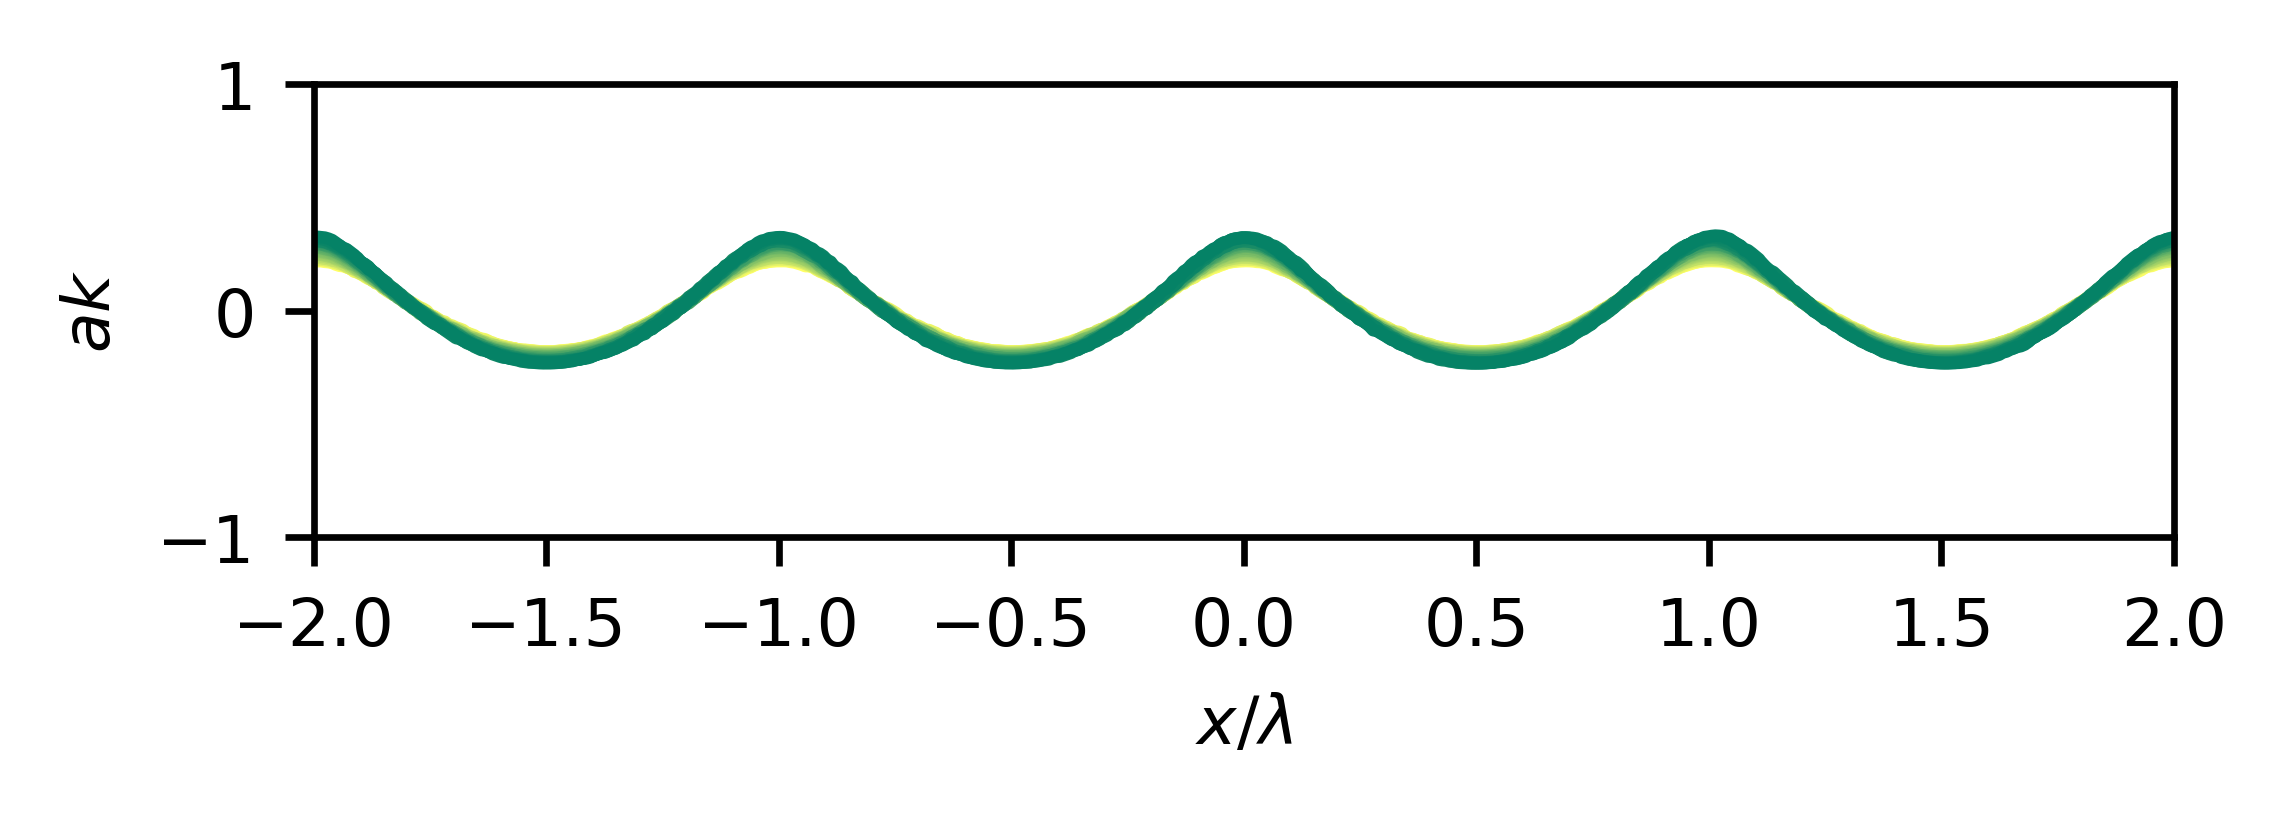

In [134]:
""" Check that the phase is computed correctly
    We can later add wave phase computation to this.
"""
case = case1
plt.figure(figsize=[4,1])
xarray = np.linspace(-2, 2, 512)
for i in range(0,np.size(case.tsimu)):
#     plt.plot(np.average(case.phase['eta'][i], axis=0)-1, label='t=%g' %case.phase['t'][i], color=plt.cm.get_cmap('summer')(1-i/5))
#     plt.plot(np.roll(np.average(case.phase['eta'][i], axis=0), -int(case.phase['idx_theo'][i]), axis=0), label='t=%g' %case.phase['t'][i], color=plt.cm.get_cmap('summer')(1-i/10))
    plt.plot(xarray, np.roll(np.average(case.phase['eta'][i], axis=0)-1, -int(case.phase['idx'][i]), axis=0)*case.k, label='t=%g' %case.phase['t'][i], color=plt.cm.get_cmap('summer')(1-i/np.size(case.tsimu)))
#     plt.plot(xarray, np.roll(np.average(case.phase['eta'][i], axis=0)-1, 0, axis=0)*case.k, label='t=%g' %case.phase['t'][i], color=plt.cm.get_cmap('summer')(1-i/np.size(case.tsimu)))
#     plt.plot(np.ones(10)*(case.phase['idx_theo'][i]+128/4), np.linspace(0.8,1.2,10), ':', color=plt.cm.get_cmap('summer')(1-i/10))
#     plt.plot(np.ones(10)*(case.phase['idx'][i] % 128)/128, np.linspace(-0.5,0.5,10), color=plt.cm.get_cmap('summer')(1-i/np.size(case.tsimu)))
plt.ylabel('$ak$')
plt.ylim([-1,1])
plt.xlim([-2,2])
plt.xlabel(r'$x/\lambda$')

Text(0, 0.5, '$\\phi (\\degree)$')

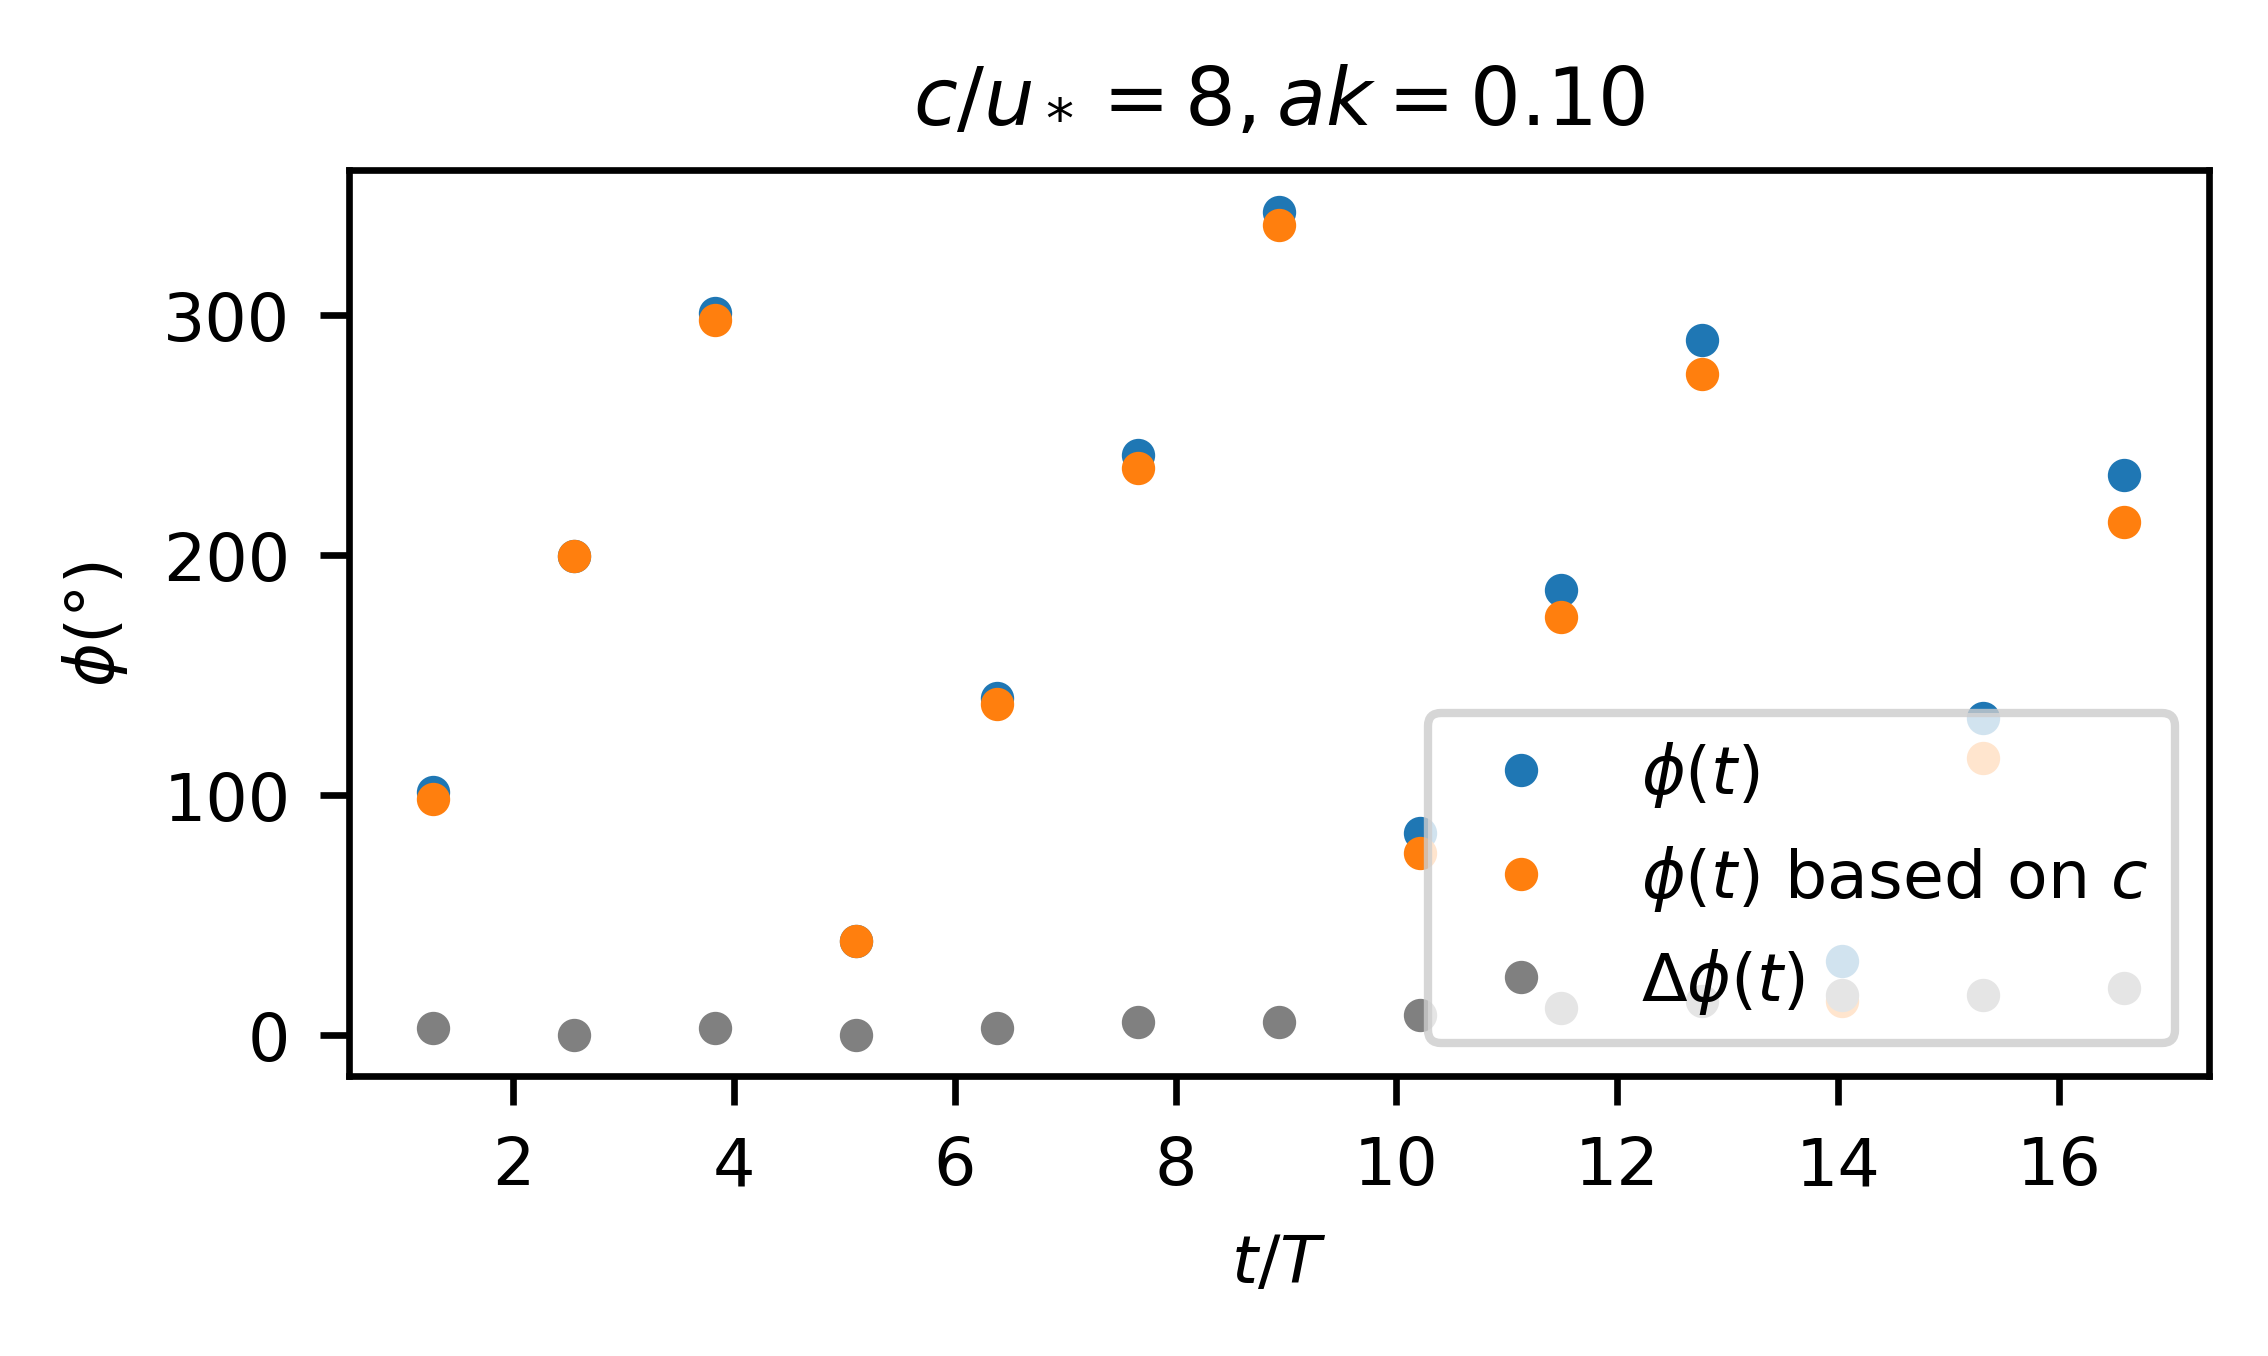

In [615]:
""" FIGURE: Compare phase to theoretical phase speed """
case = case6
plt.figure(figsize=[4,2])
T = 2*np.pi/case.wave.omega
plt.plot(np.array(case.phase['t'])/T, (np.array(case.phase['idx']) % 128)/128*360, '.', label=r'$\phi(t)$')
plt.plot(np.array(case.phase['t'])/T, (np.array(case.phase['idx_theo']))/128*360, '.', label=r'$\phi(t)$ based on $c$')
plt.plot(np.array(case.phase['t'])/T, ((np.array(case.phase['idx']) % 128 - np.array(case.phase['idx_theo'])) % 128)/128*360, '.', color='gray', label=r'$\Delta \phi(t)$')
plt.legend(loc = 'lower right'); plt.title(r'$c/u_* = %.0f, ak = %.2f$' %(case.wave.c/case.ustar, case.ak))
plt.xlabel(r'$t/T$'); plt.ylabel(r'$\phi (\degree)$')

In [616]:
case4.cc = 'magenta'
case5.cc = 'darkviolet'
case6.cc = 'blue'

In [ ]:
""" FIGURE: Change to phase speed c v.s. max drift velocity ud"""
plt.figure(figsize=[4,2])
def plot(case):
    T = 2*np.pi/case.wave.omega
    line1, = plt.plot(np.array(case.phase['t'][4:]), ((np.array(case.phase['idx']) % 128 - np.array(case.phase['idx_theo'])) % 128)[4:]/128*(2*np.pi/case.k)/np.array(case.phase['t'])[4:]/case.ustar, 
             marker = 's', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0, color=case.cc)
    line2, = plt.plot(np.array(case.phase['t'][4:]), case.u_drift/case.ustar, marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
             color=case.cc)
    return line1, line2

# for case in (case1,case2,case3):
#     line1, line2 = plot(case)
#     if case == case1:
#         line1.set_label(r'$u_{dmax}$')
#         line2.set_label(r'$\Delta c$')

for case in (case4,case5,case6):
    line1, line2 = plot(case)
    if case == case4:
        line1.set_label(r'$u_{dmax}$')
        line2.set_label(r'$\Delta c$')
        
plt.legend()
plt.title(r'$ak = %.2f$' %(case.ak))
plt.xlabel(r'$t$'); plt.ylabel(r'$u/u_*$')
plt.show()

In [201]:
""" Already knowing the phase at each time, align them
    Read in other fields. """

def read_fields (case):
    case.ux_2D = []
    case.uy_2D = []
    case.f_2D = []

    for i in tqdm(range(0,np.size(case.phase['t']))):

        NSLICE = 256    
        NGRID = 512
        ux_3D = {'name':'ux', 'value':[]} # axis0 in z, axis1 in x, axis2 in y  (in the code)
        uy_3D = {'name':'uy', 'value':[]}
        f_3D = {'name':'f', 'value':[]}
        tsimu = case.phase['t'][i] + case.tstart
        idx = case.phase['idx'][i]

        # Read in the fields either from pickle or from slice data
        for field in (ux_3D,uy_3D,f_3D):         
            """NOTICE: to accomodate different pickle versions"""
            picklename = case.path + 'field/' + 'pickle_tiger/' + field['name']+'_t%g' % tsimu +'.pkl'
    #             picklename = working_dir + 'field/' + 'pickle_desktop/' + field['name']+'_t%g' % t +'.pkl'
            exists = os.path.exists(picklename)
            # If the pickle is there read in the pickles
            if exists:
                field['value'] = load_object(picklename)
                print('pickle restored!')
            # If no pickle read in from the slice files and pickle dump
            if not exists:
                for sn in range (0, NSLICE-1):
                    filename = case.path + 'field/'+field['name']+'_t%g_slice%g' % (tsimu,sn)
                    snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
                    snapshot.reshape([NGRID,NGRID+1])
                    field['value'].append(snapshot[:,0:NGRID].astype(np.float))
                field['value'] = np.array(field['value'])
                save_object(field['value'], picklename)

            # Shift the values along x axis
            field['value'] = np.roll(field['value'], -idx, axis=1)

        case.ux_2D.append(np.average(ux_3D['value'], axis=0))
        case.uy_2D.append(np.average(uy_3D['value'], axis=0))
        case.f_2D.append(np.average(f_3D['value'], axis=0))
        

# for case in (case_pre4_1, case_pre5_1, case_pre5_2, case_pre5_3):
#     read_fields(case)
# for case in (case7, case8, case9, case10, case11, case12):
#     read_fields(case)
read_fields(case_pre2)













  0%|          | 0/13 [00:00<?, ?it/s]

pickle restored!
pickle restored!
pickle restored!














  8%|▊         | 1/13 [00:02<00:26,  2.18s/it]

pickle restored!
pickle restored!
pickle restored!














 15%|█▌        | 2/13 [00:04<00:23,  2.16s/it]

pickle restored!
pickle restored!
pickle restored!














 23%|██▎       | 3/13 [00:06<00:21,  2.15s/it]

pickle restored!
pickle restored!
pickle restored!














 31%|███       | 4/13 [00:08<00:19,  2.18s/it]

pickle restored!
pickle restored!
pickle restored!














 38%|███▊      | 5/13 [00:10<00:17,  2.19s/it]

pickle restored!
pickle restored!
pickle restored!














 46%|████▌     | 6/13 [00:13<00:15,  2.19s/it]

pickle restored!
pickle restored!
pickle restored!














 54%|█████▍    | 7/13 [00:15<00:13,  2.20s/it]

pickle restored!
pickle restored!
pickle restored!














 62%|██████▏   | 8/13 [00:17<00:11,  2.20s/it]











 69%|██████▉   | 9/13 [02:49<03:07, 47.00s/it]











 77%|███████▋  | 10/13 [05:21<03:55, 78.50s/it]











 85%|████████▍ | 11/13 [07:52<03:20, 100.35s/it]











 92%|█████████▏| 12/13 [10:23<01:55, 115.63s/it]











100%|██████████| 13/13 [12:56<00:00, 126.91s/it]

In [ ]:
""" FIGURE: Demonstrate the coordinate transform in the water. """
case = case4
i = 30 # Pick a time
ux_2D_water, zgrid = water_profile_new(case.ux_2D[i]*case.f_2D[i]**10, case=case, eta=eta)

""" Plot in original coordinate """
fig = plt.figure(figsize=[4,3]); ax = plt.gca()
eta = np.roll(np.average(case.phase['eta'][i], axis=0), -case.phase['idx'][i], axis=0) - 1
ux_2D_test, zgrid = array_newcoord(case.ux_2D[i]*case.f_2D[i]**4, case=case, eta=eta)
img = plt.imshow(np.rot90(case.ux_2D[i]*case.f_2D[i]), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
                 vmax = 0.5, vmin = -0.5)
cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
plt.axis('off')
cbar.ax.text(0.5, 1.05, r'$u_w/u_*$', ha='center', va='center', transform=cbar.ax.transAxes)

xarray = np.linspace(-np.pi, np.pi, 512)
plt.plot(xarray, eta + 1, c='k', lw=1)
plt.plot(xarray, zgrid[:,75] + 1, '--', c='k', lw=0.5)
plt.plot(xarray, zgrid[:,65] + 1, '--', c='k', lw=0.5)
plt.plot(xarray, zgrid[:,55] + 1, '--', c='k', lw=0.5)
ax.annotate(r'$z = h_w(x,y,t)$', xy=(0.01, 0.2), ha='left', va='bottom', xycoords='axes fraction', fontsize=8)

""" Plot in transformed coordinate """
fig = plt.figure(figsize=[4,3]); ax = plt.gca()
eta = np.roll(np.average(case.phase['eta'][0], axis=0), -case.phase['idx'][0], axis=0) - 1
ux_2D_test, zgrid = array_newcoord(case.ux_2D[i]*case.f_2D[i]**4, case=case, eta=eta)
img = plt.imshow(np.rot90(ux_2D_test), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
                 vmax = 0.5, vmin = -0.5)
cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
plt.axis('off')
cbar.ax.text(0.5, 1.05, r'$u_w/u_*$', ha='center', va='center', transform=cbar.ax.transAxes)
xarray = np.linspace(-np.pi, np.pi, 512)
plt.plot(xarray, np.ones(512), c='k', lw=1)
plt.plot(xarray, np.ones(512)*(75/512)*2*np.pi, '--', c='k', lw=0.5)
plt.plot(xarray, np.ones(512)*(65/512)*2*np.pi, '--', c='k', lw=0.5)
plt.plot(xarray, np.ones(512)*(55/512)*2*np.pi, '--', c='k', lw=0.5)
ax.annotate(r'$\zeta = 0$', xy=(0.01, 0.2), ha='left', va='bottom', xycoords='axes fraction', fontsize=8)























  0%|          | 0/44 [00:00<?, ?it/s]





















  2%|▏         | 1/44 [00:00<00:30,  1.40it/s]





















  5%|▍         | 2/44 [00:01<00:29,  1.41it/s]





















  7%|▋         | 3/44 [00:02<00:29,  1.41it/s]





















  9%|▉         | 4/44 [00:02<00:28,  1.41it/s]





















 11%|█▏        | 5/44 [00:03<00:27,  1.41it/s]





















 14%|█▎        | 6/44 [00:04<00:26,  1.42it/s]





















 16%|█▌        | 7/44 [00:04<00:25,  1.43it/s]





















 18%|█▊        | 8/44 [00:05<00:25,  1.43it/s]





















 20%|██        | 9/44 [00:06<00:24,  1.44it/s]





















 23%|██▎       | 10/44 [00:06<00:23,  1.45it/s]





















 25%|██▌       | 11/44 [00:07<00:22,  1.44it/s]





















 27%|██▋       | 12/44 [00:08<00:22,  1.43it/s]





















 30%|██▉       | 13/44 [00:09<00:21,  1.42it/s]





















 32%|███▏      | 14/44 [00:09<

Text(0, 0.5, '$yk$')

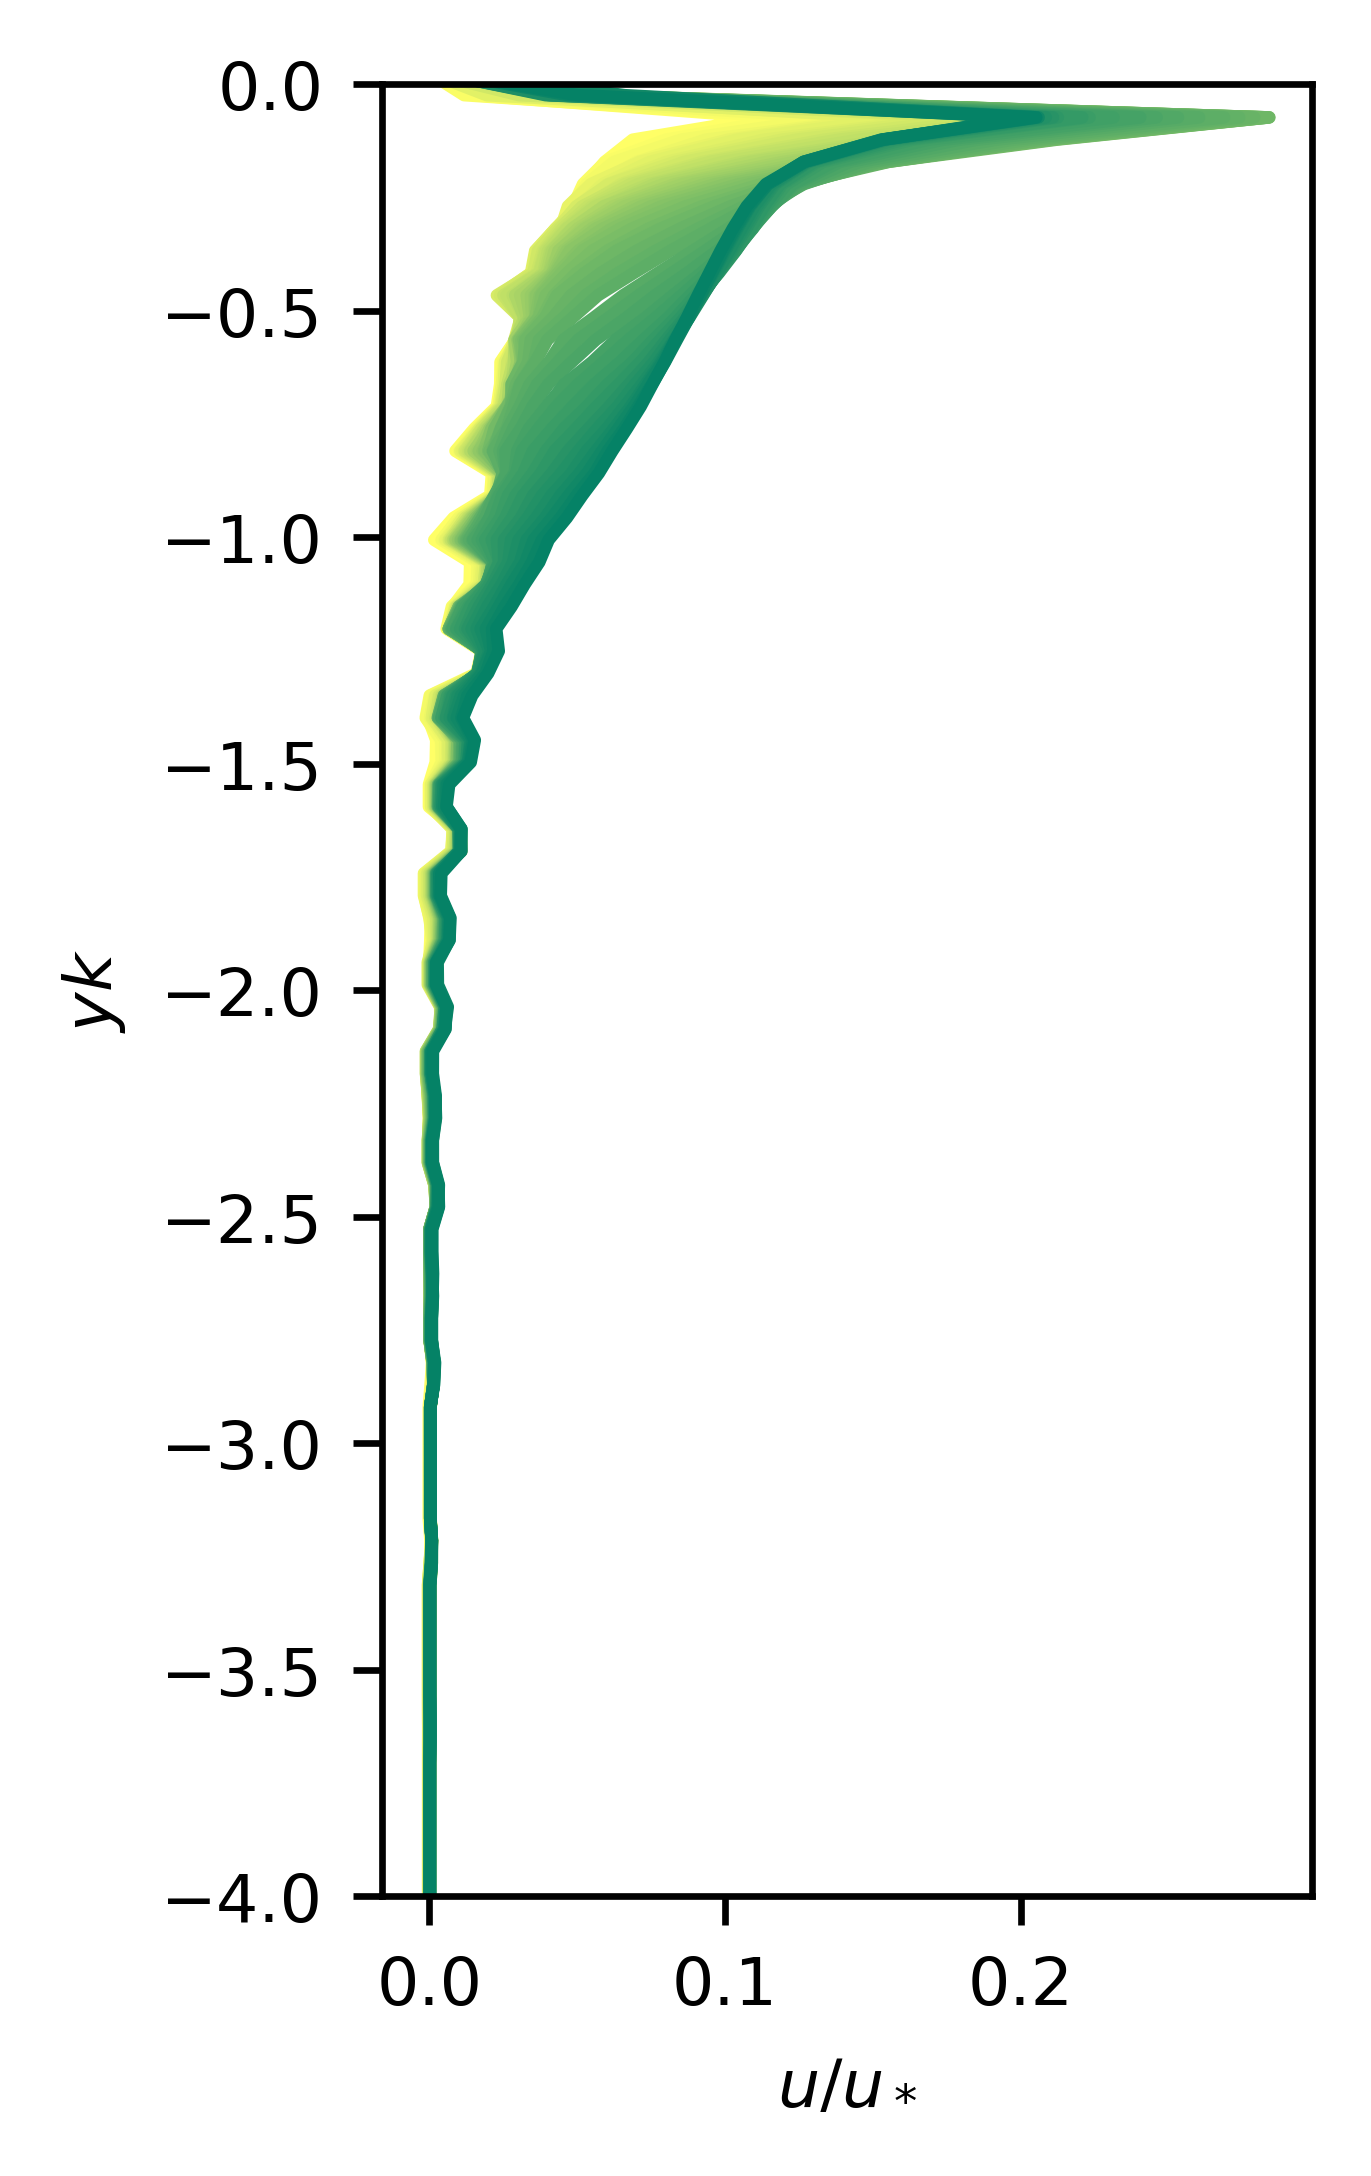

In [621]:
""" Plot the drift layer in a wave following coord. """
plt.figure(figsize=[2,4])
case = case2
case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2
case.u_drift = np.zeros(len(case.ux_2D)) # Array of the maximum drift velocity at different time
for i in tqdm(range(0,len(case.ux_2D))):
    eta = np.roll(np.average(case.phase['eta'][i], axis=0), -case.phase['idx'][i], axis=0) - 1
#     ux_2D_water = case.ux_2D[i]*case.f_2D[i]**10
    ux_2D_water, zgrid = water_profile_new(case.ux_2D[i]*case.f_2D[i]**10, case=case, eta=eta)
#     ux_2D_water = water_profile_new(case.ux_2D[i]*case.f_2D[i]**10, case=case)
    u_1D = np.average(ux_2D_water, axis=0)
    case.u_drift[i] = u_1D.max()
    plt.plot(u_1D/case.ustar, (case.yarray-1)*case.k, color=plt.cm.get_cmap('summer')(1-i/len(case.ux_2D)))
plt.ylim([-4,0])
plt.xlabel(r'$u/u_*$'); plt.ylabel(r'$yk$')

In [ ]:
""" OLD: Plot the drift layer. NOTICE: not wave coherent yet. (Eulerian mean) """
plt.figure(figsize=[2,4])
case = case2
case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2
for i in tqdm(range(len(case.ux_2D))):
    u_1D = np.average(case.ux_2D[i]*case.f_2D[i]**10, axis=0)
    plt.plot(u_1D/case.ustar, (case.yarray-1)*case.k, color=plt.cm.get_cmap('summer')(1-i/len(case.ux_2D)))
plt.ylim([-2,0])
plt.xlabel(r'$u/u_*$'); plt.ylabel(r'$yk$')

In [ ]:
""" Compute the phase average and the horizontal average. 
    case.uy_2D_phaseaver-case.uy_2D_horizaver is the wave coherent part.
    case.field_2D is of dimension time*Nx*Nz
    case.field_2D_phaseaver and case.field_2D_horizaver is of dimension Nx*Ny
"""

case.ux_2D = np.array(case.ux_2D)
case.uy_2D = np.array(case.uy_2D)
case.f_2D = np.array(case.f_2D)

""" Phase average """
case.ux_2D_phaseaver = np.average(case.ux_2D, axis=0) 
case.uy_2D_phaseaver = np.average(case.uy_2D, axis=0)
case.f_2D_phaseaver = np.average(case.f_2D, axis=0)

""" Average over x and then broadcase to a 2D array again.
    TODO: Can add wave cordinate following average here.
"""
case.ux_2D_horizaver = np.tile(np.average(case.ux_2D, axis=(0,1)), (512,1))
case.uy_2D_horizaver = np.tile(np.average(case.uy_2D, axis=(0,1)), (512,1))
case.f_2D_horizaver = np.tile(np.average(case.f_2D, axis=(0,1)), (512,1))

In [86]:
""" Compute the turbulent stress. 
    Use the value of ux_2D_phaseaver and uy_2D_phaseaver computed above (broadcasted back to 3D).
'"""

case.uxuy_2D = []
ux_3D_phaseaver = np.tile(case.ux_2D_phaseaver, (255,1,1))
uy_3D_phaseaver = np.tile(case.uy_2D_phaseaver, (255,1,1))

for i in tqdm(range(4,np.size(case.tsimu))):
    
    ux_3D = {'name':'ux', 'value':[]} # axis0 in z, axis1 in x, axis2 in y  (in the code)
    uy_3D = {'name':'uy', 'value':[]}
    f_3D = {'name':'f', 'value':[]}
    tsimu = case.phase['t'][i] + case.tstart
    idx = case.phase['idx'][i]
    
    # Read in the fields either from pickle or from slice data
    for field in (ux_3D,uy_3D,f_3D):         
        """NOTICE: to accomodate different pickle versions"""
        picklename = case.path + 'field/' + 'pickle_tiger/' + field['name']+'_t%g' % tsimu +'.pkl'
#             picklename = working_dir + 'field/' + 'pickle_desktop/' + field['name']+'_t%g' % t +'.pkl'
        exists = os.path.exists(picklename)
        # If the pickle is there read in the pickles
        if exists:
            field['value'] = load_object(picklename)
            print('pickle restored!')
        # If no pickle read in from the slice files and pickle dump
        if not exists:
            for sn in range (0, NSLICE-1):
                filename = case.path + 'field/'+field['name']+'_t%g_slice%g' % (tsimu,sn)
                snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
                snapshot.reshape([NGRID,NGRID+1])
                field['value'].append(snapshot[:,0:NGRID].astype(np.float))
            field['value'] = np.array(field['value'])
            save_object(field['value'], picklename)
    
    re_stress_3D = (ux_3D['value']-ux_3D_phaseaver)*(uy_3D['value']-uy_3D_phaseaver)*(1-f_3D['value'])
    re_stress_3D = np.roll(re_stress_3D, -idx, axis=1)   
    case.uxuy_2D.append(np.average(re_stress_3D, axis=0))



  0%|          | 0/32 [00:00<?, ?it/s]

pickle restored!
pickle restored!
pickle restored!




  3%|▎         | 1/32 [00:03<01:38,  3.19s/it]

pickle restored!
pickle restored!
pickle restored!




  6%|▋         | 2/32 [00:06<01:34,  3.15s/it]

pickle restored!
pickle restored!
pickle restored!




  9%|▉         | 3/32 [00:09<01:31,  3.17s/it]

pickle restored!
pickle restored!
pickle restored!




 12%|█▎        | 4/32 [00:12<01:27,  3.14s/it]

pickle restored!
pickle restored!
pickle restored!




 16%|█▌        | 5/32 [00:15<01:23,  3.09s/it]

pickle restored!
pickle restored!
pickle restored!




 19%|█▉        | 6/32 [00:18<01:19,  3.07s/it]

pickle restored!
pickle restored!
pickle restored!




 22%|██▏       | 7/32 [00:21<01:16,  3.07s/it]

pickle restored!
pickle restored!
pickle restored!




 25%|██▌       | 8/32 [00:24<01:12,  3.03s/it]

pickle restored!
pickle restored!
pickle restored!




 28%|██▊       | 9/32 [00:27<01:10,  3.07s/it]

pickle restored!
pickle restored!
pickle restored!




 31%|███▏      | 10/32 [00:30<01:06,  3.02s/it]

pickle restored!
pickle restored!
pickle restored!




 34%|███▍      | 11/32 [00:33<01:01,  2.93s/it]

pickle restored!
pickle restored!
pickle restored!




 38%|███▊      | 12/32 [00:36<00:57,  2.87s/it]

pickle restored!
pickle restored!
pickle restored!




 41%|████      | 13/32 [00:38<00:54,  2.86s/it]

pickle restored!
pickle restored!
pickle restored!




 44%|████▍     | 14/32 [00:42<00:55,  3.07s/it]

pickle restored!
pickle restored!
pickle restored!




 47%|████▋     | 15/32 [00:45<00:51,  3.04s/it]

pickle restored!
pickle restored!
pickle restored!




 50%|█████     | 16/32 [00:48<00:48,  3.05s/it]

pickle restored!
pickle restored!
pickle restored!




 53%|█████▎    | 17/32 [00:51<00:45,  3.03s/it]

pickle restored!
pickle restored!
pickle restored!




 56%|█████▋    | 18/32 [00:54<00:42,  3.02s/it]

pickle restored!
pickle restored!
pickle restored!




 59%|█████▉    | 19/32 [00:57<00:39,  3.07s/it]

pickle restored!
pickle restored!
pickle restored!




 62%|██████▎   | 20/32 [01:00<00:37,  3.08s/it]

pickle restored!
pickle restored!
pickle restored!




 66%|██████▌   | 21/32 [01:03<00:33,  3.06s/it]

pickle restored!
pickle restored!
pickle restored!




 69%|██████▉   | 22/32 [01:06<00:30,  3.05s/it]

pickle restored!
pickle restored!
pickle restored!




 72%|███████▏  | 23/32 [01:09<00:27,  3.02s/it]

pickle restored!
pickle restored!
pickle restored!




 75%|███████▌  | 24/32 [01:12<00:24,  3.01s/it]

pickle restored!
pickle restored!
pickle restored!




 78%|███████▊  | 25/32 [01:15<00:21,  3.01s/it]

pickle restored!
pickle restored!
pickle restored!




 81%|████████▏ | 26/32 [01:19<00:19,  3.17s/it]

pickle restored!
pickle restored!
pickle restored!




 84%|████████▍ | 27/32 [01:22<00:16,  3.29s/it]

pickle restored!
pickle restored!
pickle restored!




 88%|████████▊ | 28/32 [01:25<00:12,  3.18s/it]

pickle restored!
pickle restored!
pickle restored!




 91%|█████████ | 29/32 [01:28<00:09,  3.13s/it]

pickle restored!
pickle restored!
pickle restored!




 94%|█████████▍| 30/32 [01:31<00:06,  3.13s/it]

pickle restored!
pickle restored!
pickle restored!




 97%|█████████▋| 31/32 [01:34<00:03,  3.08s/it]

pickle restored!
pickle restored!
pickle restored!




100%|██████████| 32/32 [01:37<00:00,  3.07s/it]

In [87]:
""" Compute the phase average and the horizontal average. """
case.uxuy_2D = np.array(case.uxuy_2D)
case.uxuy_2D_phaseaver = np.average(case.uxuy_2D, axis=0)
case.uxuy_2D_horizaver = np.tile(np.average(case.uxuy_2D, axis=(0,1)), (512,1))

Text(0.5, 1.05, '$\\overline{u^{\\prime} w^{\\prime}}$')

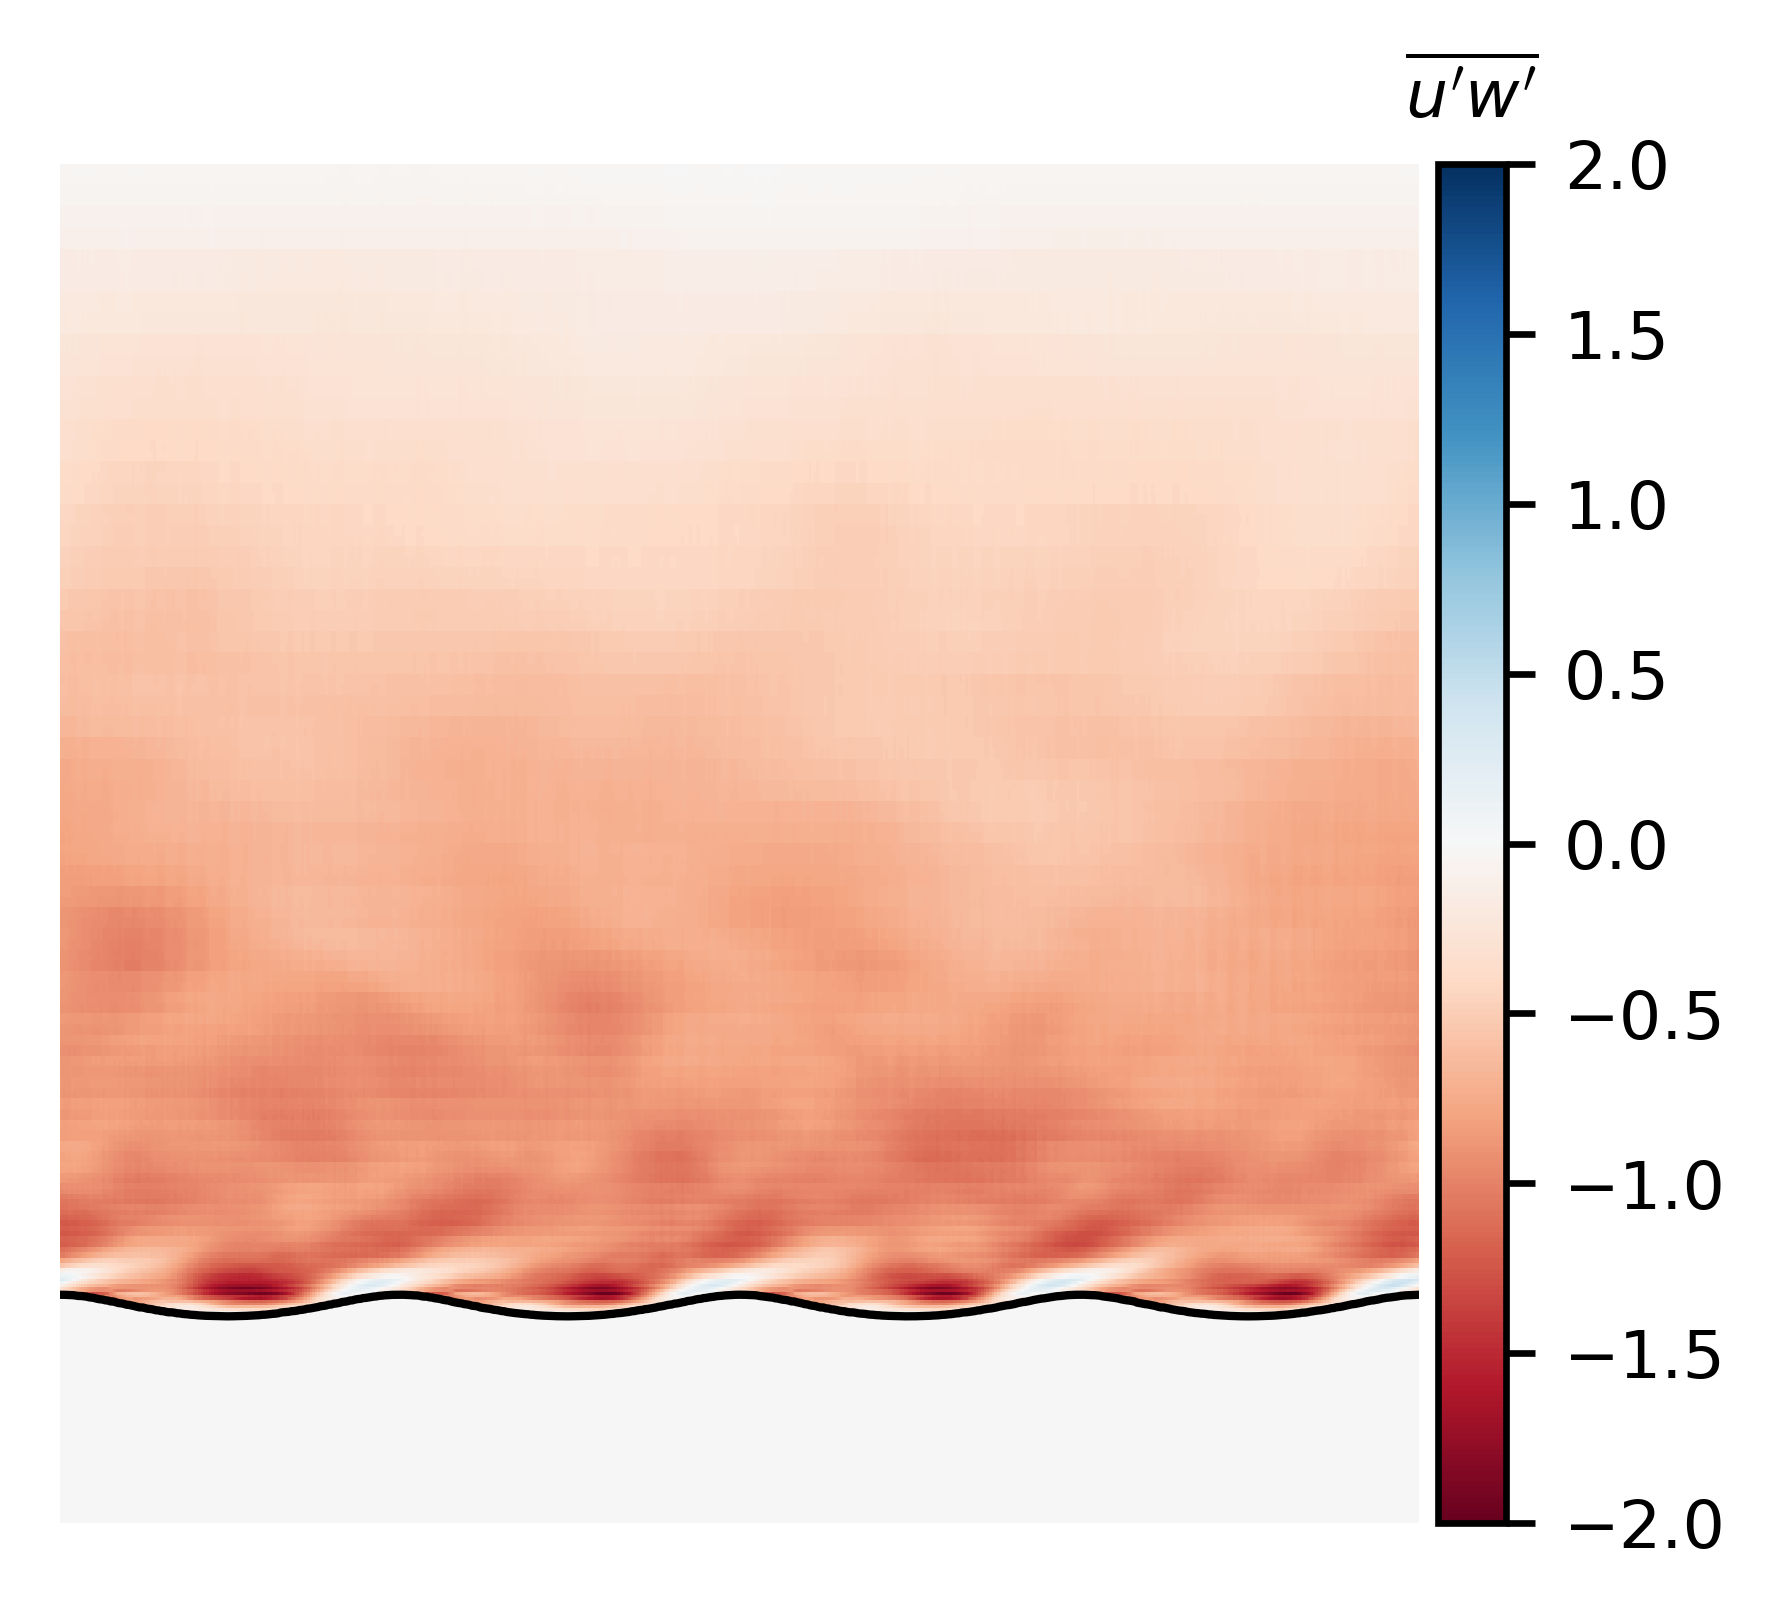

In [91]:
""" Some visualization """
fig = plt.figure(figsize=[4,3])
# quant = (case.uy_2D_phaseaver-case.uy_2D_horizaver)*(case.ux_2D_phaseaver-case.ux_2D_horizaver)/0.25**2*case.f_2D[0] # The quantity to be plotted
quant = (case.uy_2D_phaseaver-case.uy_2D_horizaver)*(case.ux_2D_phaseaver-case.ux_2D_horizaver)/0.25**2*(1-case.f_2D[0]) # The quantity to be plotted
# quant = (case.uxuy_2D_phaseaver-case.uxuy_2D_horizaver)/0.25**2*(1-case.f_2D[0])
quant = (case.uxuy_2D_phaseaver)/0.25**2*(1-case.f_2D[0])

img = plt.imshow(np.rot90(quant), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
                 vmax = +2, vmin = -2)
xarray = np.linspace(-np.pi, np.pi, 512)
eta = np.roll(np.average(case.phase['eta'][0], axis=0), -case.phase['idx'][0], axis=0)
plt.plot(xarray, eta, c='k', lw=1)
# plt.plot(xarray, 1.14*np.ones(np.size(xarray)), '--', lw=0.5, color='gray')
cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
plt.axis('off')
cbar.ax.text(0.5, 1.05, r'$\overline{u^{\prime} w^{\prime}}$', ha='center', va='center', transform=cbar.ax.transAxes)
# cbar.ax.text(0.5, 1.05, r'$(\overline{u^{\prime} w^{\prime}} - \langle u^{\prime} w^{\prime} \rangle)/u_{*}^2$', ha='center', va='center', transform=cbar.ax.transAxes)
# cbar.ax.text(0.5, 1.05, r'$\tilde{u}\tilde{w}/u_{*}^2$', ha='center', va='center', transform=cbar.ax.transAxes)

Text(0.5, 1.05, '$\\tilde{w}/u_{*}$')

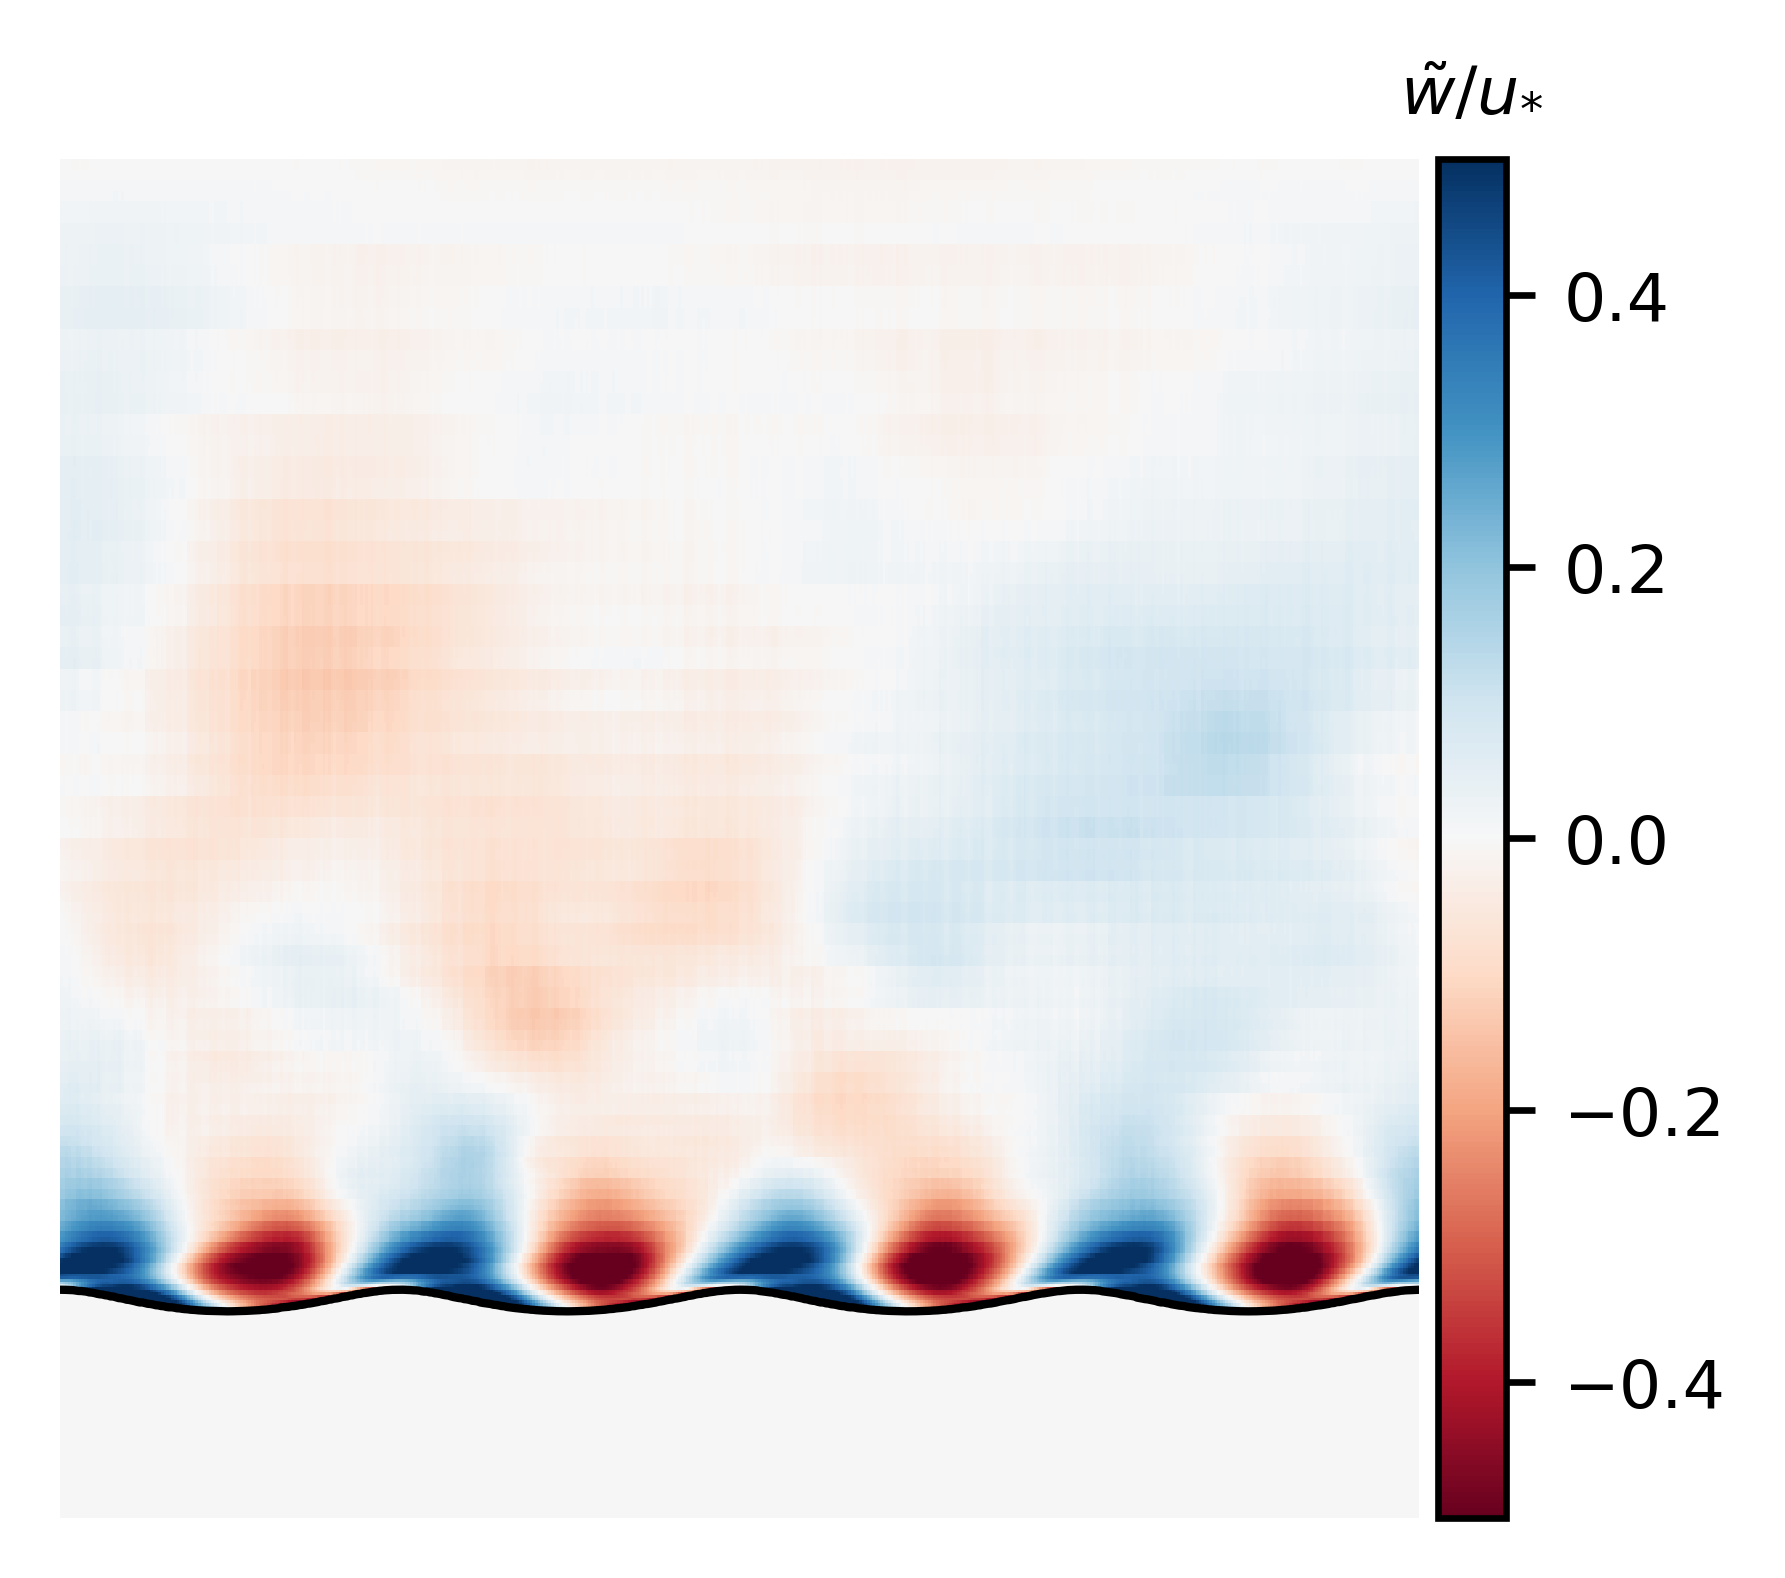

In [92]:
""" Some visualization (velocity) """
fig = plt.figure(figsize=[4,3])
# quant = (case.ux_2D_horizaver-case.wave.c)/0.25*(1-case.f_2D[0]) # The quantity to be plotted
quant = (case.uy_2D_phaseaver)/0.25*(1-case.f_2D[0]) # The quantity to be plotted

img = plt.imshow(np.rot90(quant), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
                 vmax = +0.5, vmin = -0.5)
xarray = np.linspace(-np.pi, np.pi, 512)
eta = np.roll(np.average(case.phase['eta'][0], axis=0), -case.phase['idx'][0], axis=0)
plt.plot(xarray, eta, c='k', lw=1)

cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
plt.axis('off')
cbar.ax.text(0.5, 1.05, r'$\tilde{w}/u_{*}$', ha='center', va='center', transform=cbar.ax.transAxes)

AttributeError: 'Case' object has no attribute 'uy_2D_phaseaver'

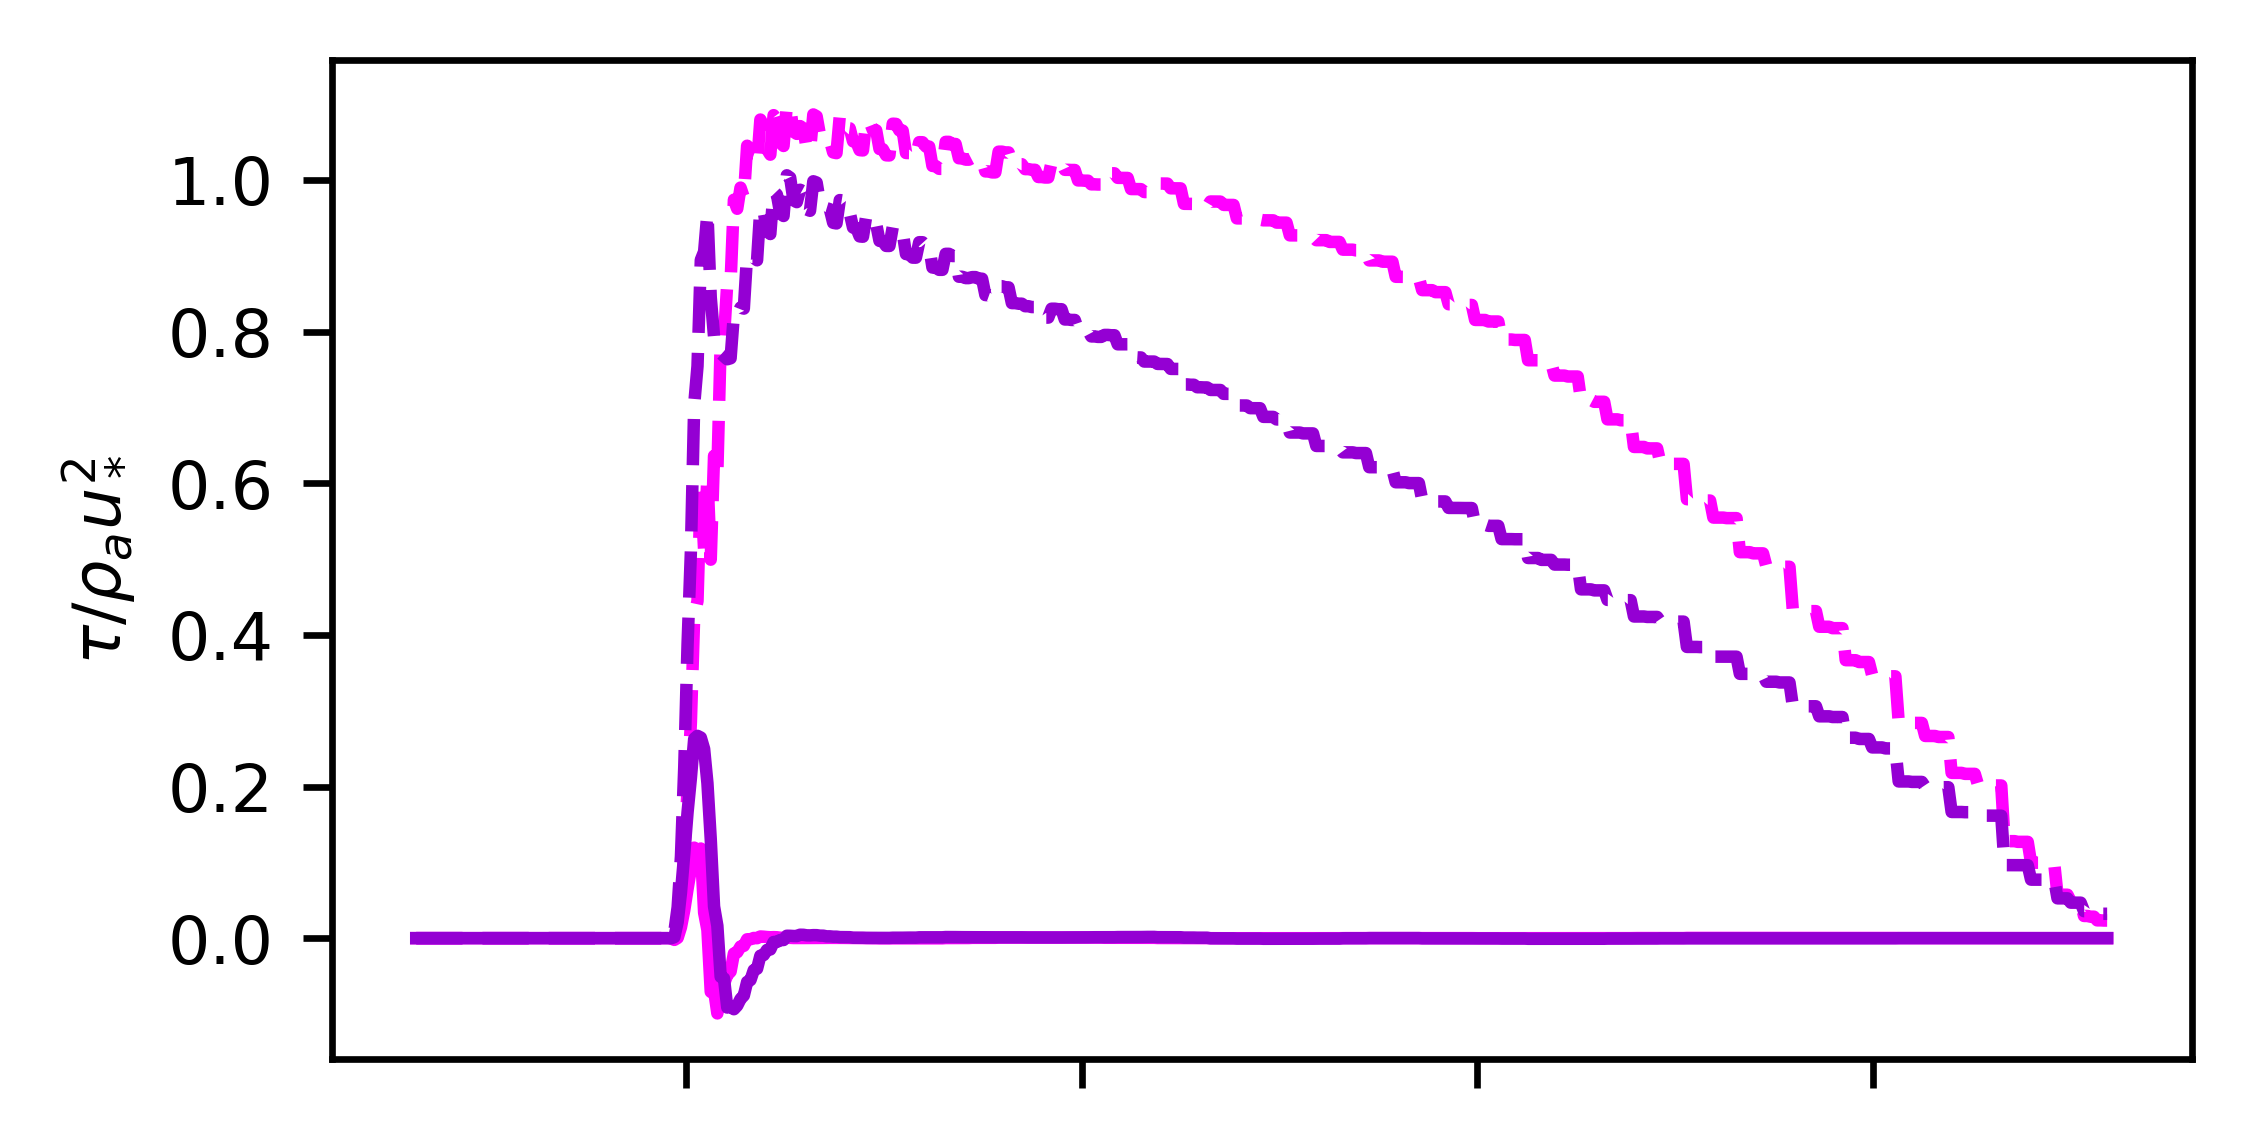

In [108]:
""" Plot the 1D profile along z
    Link with the two scales yk nad y/ytau 
"""

plt.figure(figsize=[4,7.5])

""" Stress quantities. """
ax1 = plt.subplot(311)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r"$\tau/\rho_a u_*^2$")

def plot_stress (case, color):
    quant1 = -(case.uy_2D_phaseaver-case.uy_2D_horizaver)*(case.ux_2D_phaseaver-case.ux_2D_horizaver)/0.25**2*(1-case.f_2D[0])
    plt.plot((case.yarray-1)/case.ytau, np.average(quant1, axis=0), color=color)
    # quant = (case.uxuy_2D_phaseaver-case.uxuy_2D_horizaver)/0.25**2 # This averages to zero
    quant2 = -case.uxuy_2D_horizaver/0.25**2
    plt.plot((case.yarray-1)/case.ytau, np.average(quant2, axis=0), '--', color=color)
#     plt.plot((case.yarray-1)/case.ytau, np.average(quant1+quant2, axis=0), ':', color=color)

for (case, color) in zip((case1,case2,case3),('magenta','darkviolet','blue')):
    case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2
    case.ytau = (2*np.pi-1)/case.Retau
    plot_stress(case, color)
# for (case, color) in zip((case4,case5,case6),('magenta','darkviolet','blue')):
#     case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2
#     case.ytau = (2*np.pi-1)/case.Retau
#     plot_stress(case, color)

""" Flow field quantities. """

def plot_velocity (case, color, range1, range2):
    """ Plot velocity and two time scales Te and Ta. """
    plt.plot((case.yarray-1)/case.ytau, (np.average(case.ux_2D_horizaver, axis=0) - case.wave.c)/0.25, 
              marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
              color=color, label=r'$c/u_* = %.0f$' %(case.wave.c/case.ustar))
    plt.plot((case.yarray[range1:range2:2]-1)/case.ytau, (case.yarray[range1:range2:2]-1)/case.ustar*np.pi/0.41, color='gray', alpha=0.5) # T_e = (\pi/\kappa)y/u_*
    plt.plot((case.yarray[range1:range2:2]-1)/case.ytau, (case.yarray[range1:range2:2]-1)/case.ustar, color='gray', alpha=0.5) # Alternative def of T_e = y/\bar{u}(y)
    plt.plot((case.yarray[range1:range2]-1)/case.ytau, 2*np.pi/((np.average(case.ux_2D_horizaver, axis=0)[range1:range2]-case.wave.c)*case.k), color=color, alpha=0.5) # T_a = \lambda/(\bar{u}(y)-c)
    plt.ylim([-2, 23])
    
def plot_gradient (case, color, range1, range2):
    """ Plot the gradient of the meant, required to compute medium layer height.
        Also helps to compute viscous stress. """
    plt.plot((case.yarray-1)/case.ytau, (np.average(case.ux_2D_horizaver, axis=0))/0.25, 
              marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
              color=color, label=r'$c/u_* = %.0f$' %(case.wave.c/case.ustar))
    ux_simu = (np.average(case.ux_2D_horizaver, axis=0))/case.ustar
    ux_smooth = butter_lowpass_filter(ux_simu[range1:range2], CUT=32, N=512)
    # plt.plot((case.yarray[start:-1]-1)/ytau, ux_simu)
    plt.plot((case.yarray[range1:range2]-1)/case.ytau, ux_smooth, color=color, alpha=0.5)
    quant = np.gradient(ux_smooth)/(case.L0/case.N)/(ux_smooth-case.wave.c)/case.k 
    plt.plot((case.yarray[range1:range2]-1)/case.ytau, quant, '--', color=color, alpha = 0.5) # r'$|U(y)^{\prime}/kU||$'
    plt.plot((case.yarray[range1:range2]-1)/case.ytau, (case.yarray[range1:range2]-1)*case.k/case.ustar, color='gray', alpha=0.5) # r'$ky$'

ax2 = plt.subplot(312, sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)
for (case, color, range1) in zip((case1,case2,case3),('magenta','darkviolet','blue'), (86, 87, 92)):
    plot_velocity(case, color, range1, 620)
# for (case, color, range1) in zip((case4,case5,case6),('magenta','darkviolet','blue'), (86, 87, 92)):
#     plot_velocity(case, color, range1, 620)
ax2.set_ylabel(r'$(U-c)/u_*$')
ax2.set_ylim([-6, 21])
    
ax3 = plt.subplot(313, sharex=ax1)
for (case, color, range1) in zip((case1,case2,case3),('magenta','darkviolet','blue'), (82, 82, 82)):
    plot_gradient(case, color, range1, 400)
# for (case, color, range1) in zip((case4,case5,case6),('magenta','darkviolet','blue'), (82, 82, 83)):
#     plot_gradient(case, color, range1, 400)
ax3.set_ylabel(r'$U$')
ax3.set_ylim([-1, 26])

""" TODO: Miles' quantities """

""" Roughness length"""
y = np.arange(0.01,400)
plt.plot(y, 1/0.4*np.log(y)+1, color='green', alpha=0.5)
ax.annotate(r'$z_0$', xy=(0.2,0.05), ha='left', va='top', xycoords='axes fraction', color='green')

""" Formatting the axes. """
# plt.xscale('log')
plt.xlim([0.5, 690])
ax3.annotate(r'$y/y_{\nu}$', xy=(1, 0), ha='left', va='top', xycoords='axes fraction')
ax3.set_ylabel(r'$U/u_*$') 
# plt.legend(loc='upper left')

def forward(x):
    return x*case.ytau*case.k
def back(x):
    return x/case.k/case.ytau

secax_x2 = ax3.secondary_xaxis(-0.12, functions=(forward, back))
ax3.annotate(r'$yk$', xy=(1, -0.12), ha='left', va='top', xycoords='axes fraction')

plt.subplots_adjust(wspace=0, hspace=0.05)
ax2.legend(loc='upper left')

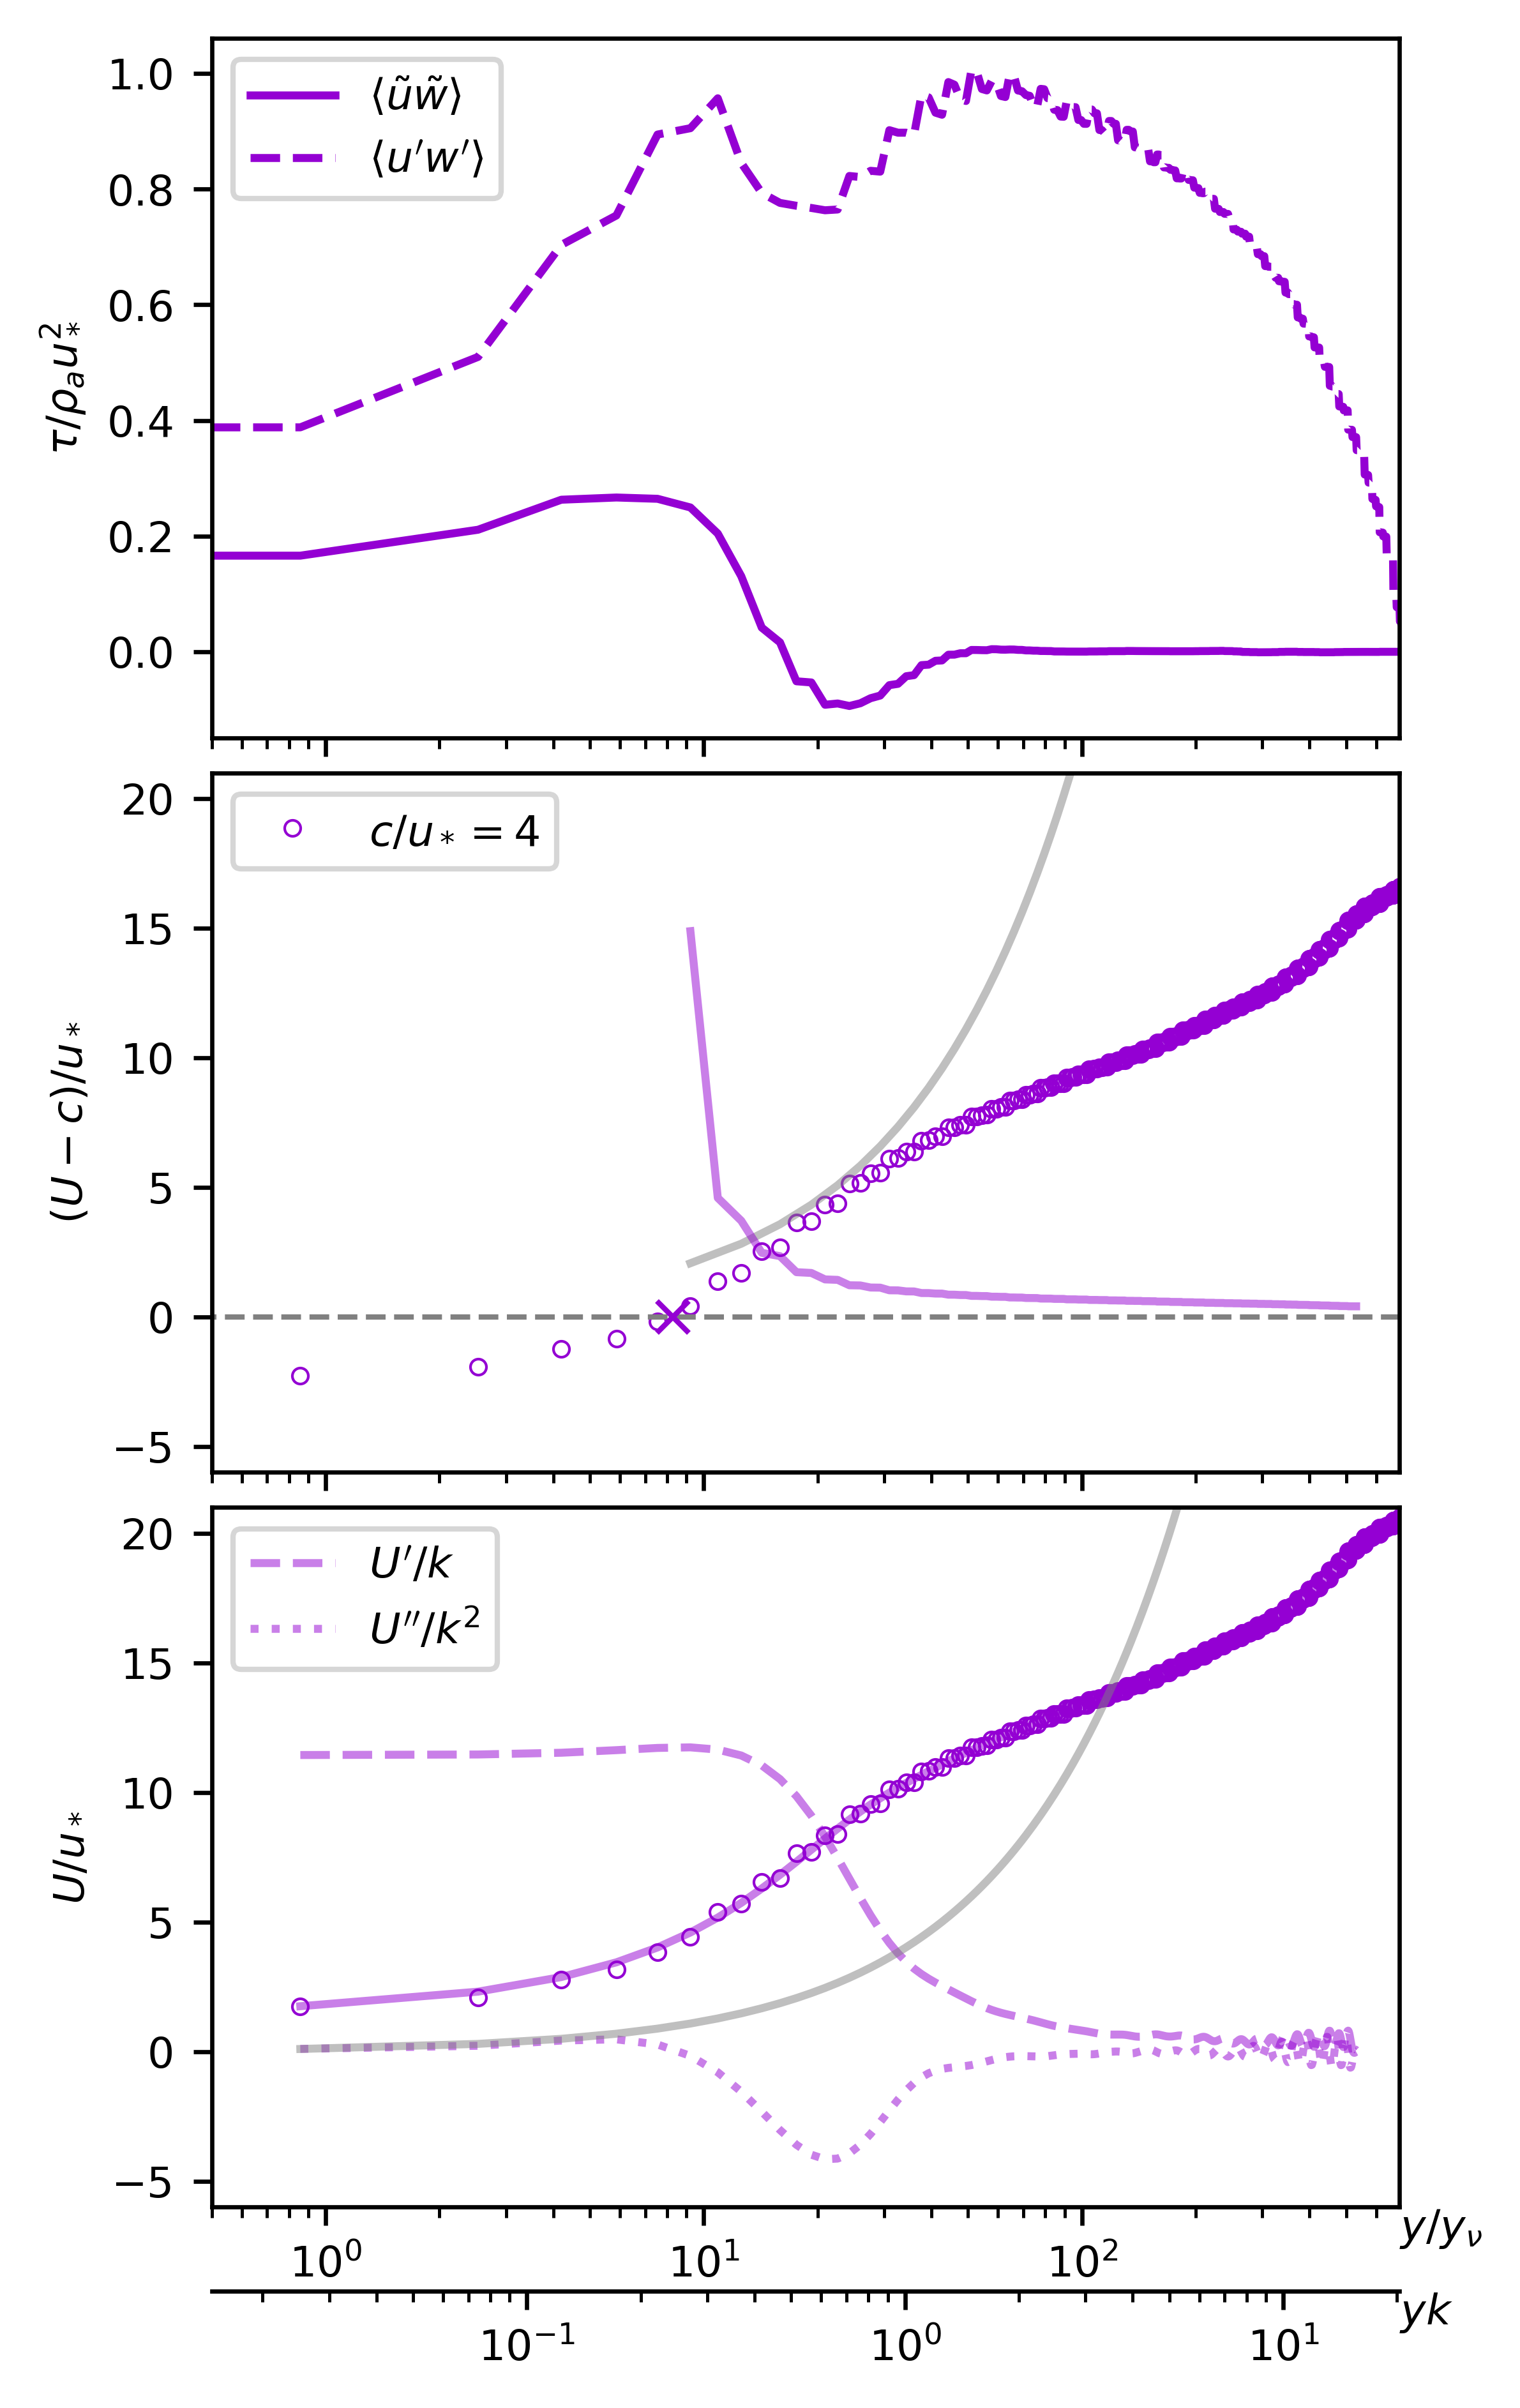

In [120]:
""" Plot the 1D profile along z
    Link with the two scales yk nad y/ytau 
"""

plt.figure(figsize=[4,7.5])

""" Stress quantities. """
ax1 = plt.subplot(311)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r"$\tau/\rho_a u_*^2$")

def plot_stress (case, color):
    quant1 = -(case.uy_2D_phaseaver-case.uy_2D_horizaver)*(case.ux_2D_phaseaver-case.ux_2D_horizaver)/0.25**2*(1-case.f_2D[0])
    plt.plot((case.yarray-1)/case.ytau, np.average(quant1, axis=0), color=color, label = r'$\langle\tilde{u}\tilde{w}\rangle$')
    # quant = (case.uxuy_2D_phaseaver-case.uxuy_2D_horizaver)/0.25**2 # This averages to zero
    quant2 = -case.uxuy_2D_horizaver/0.25**2
    plt.plot((case.yarray-1)/case.ytau, np.average(quant2, axis=0), '--', color=color, label = r'$\langle u^{\prime}w^{\prime}\rangle$')
#     plt.plot((case.yarray-1)/case.ytau, np.average(quant1+quant2, axis=0), ':', color=color)

case = case2
case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2
case.ytau = (2*np.pi-1)/case.Retau
plot_stress(case, 'darkviolet')
# for (case, color) in zip((case4,case5,case6),('magenta','darkviolet','blue')):
#     case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2
#     case.ytau = (2*np.pi-1)/case.Retau
#     plot_stress(case, color)

""" Flow field quantities. """

def plot_velocity (case, color, range1, range2):
    """ Plot velocity and two time scales Te and Ta. """
    plt.plot((case.yarray-1)/case.ytau, (np.average(case.ux_2D_horizaver, axis=0) - case.wave.c)/0.25, 
              marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
              color=color, label=r'$c/u_* = %.0f$' %(case.wave.c/case.ustar))
    plt.plot((case.yarray[range1:range2:2]-1)/case.ytau, (case.yarray[range1:range2:2]-1)/case.ustar*np.pi/0.41, color='gray', alpha=0.5) # T_e = (\pi/\kappa)y/u_*
#     plt.plot((case.yarray[range1:range2:2]-1)/case.ytau, (case.yarray[range1:range2:2]-1)/case.ustar, color='gray', alpha=0.5) # Alternative def of T_e = y/\bar{u}(y)
    plt.plot((case.yarray[range1:range2]-1)/case.ytau, 2*np.pi/((np.average(case.ux_2D_horizaver, axis=0)[range1:range2]-case.wave.c)*case.k), color=color, alpha=0.5) # T_a = \lambda/(\bar{u}(y)-c)
    plt.ylim([-2, 23])
    plt.plot((case.yarray-1)/case.ytau, 0*(case.yarray-1)/case.ytau, '--', color='gray', lw=1)
    
def plot_gradient (case, color, range1, range2):
    """ Plot the gradient of the meant, required to compute medium layer height.
        Also helps to compute viscous stress. """
    plt.plot((case.yarray-1)/case.ytau, (np.average(case.ux_2D_horizaver, axis=0))/0.25, 
              marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0, color=color)
    ux_simu = (np.average(case.ux_2D_horizaver, axis=0))/case.ustar
    ux_smooth = butter_lowpass_filter(ux_simu[range1:range2], CUT=32, N=512)
    # plt.plot((case.yarray[start:-1]-1)/ytau, ux_simu)
    plt.plot((case.yarray[range1:range2]-1)/case.ytau, ux_smooth, color=color, alpha=0.5)
#     quant = np.gradient(ux_smooth)/(case.L0/case.N)/(ux_smooth-case.wave.c)/case.k 
#     plt.plot((case.yarray[range1:range2]-1)/case.ytau, quant, '--', color=color, alpha = 0.5) # r'$|U(y)^{\prime}/kU||$'
    grad = np.gradient(ux_smooth)/(case.L0/case.N)/case.k
    plt.plot((case.yarray[range1:range2]-1)/case.ytau, grad, '--', color=color, alpha = 0.5, label=r'$U^{\prime}/k$') # r'$|U(y)^{\prime}/kU||$'
    curv = np.gradient(grad)/(case.L0/case.N)/case.k**2
    plt.plot((case.yarray[range1:range2]-1)/case.ytau, curv, ':', color=color, alpha = 0.5, label=r'$U^{\prime\prime}/k^2$')     
    plt.plot((case.yarray[range1:range2]-1)/case.ytau, (case.yarray[range1:range2]-1)*case.k/case.ustar, color='gray', alpha=0.5) # r'$ky$'

ax2 = plt.subplot(312, sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)
range1 = 87
plot_velocity(case2, 'darkviolet', range1, 400)
# for (case, color, range1) in zip((case4,case5,case6),('magenta','darkviolet','blue'), (86, 87, 92)):
#     plot_velocity(case, color, range1, 620)
ax2.plot(8.3,0,'x', color='darkviolet')
ax2.set_ylabel(r'$(U-c)/u_*$')
ax2.set_ylim([-6, 21])
    
ax3 = plt.subplot(313, sharex=ax1)
range1 = 82
plot_gradient(case2, 'darkviolet', range1, 400)
# for (case, color, range1) in zip((case4,case5,case6),('magenta','darkviolet','blue'), (82, 82, 83)):
#     plot_gradient(case, color, range1, 400)
ax3.set_ylabel(r'$U$')
ax3.set_ylim([-6, 21])

""" TODO: Miles' quantities """

""" Roughness length"""
# y = np.arange(0.01,400)
# plt.plot(y, 1/0.4*np.log(y)+1, color='green', alpha=0.5)
# ax.annotate(r'$z_0$', xy=(0.2,0.05), ha='left', va='top', xycoords='axes fraction', color='green')

""" Formatting the axes. """
plt.xscale('log')
plt.xlim([0.5, 690])
ax3.annotate(r'$y/y_{\nu}$', xy=(1, 0), ha='left', va='top', xycoords='axes fraction')
ax3.set_ylabel(r'$U/u_*$') 
# plt.legend(loc='upper left')

def forward(x):
    return x*case.ytau*case.k
def back(x):
    return x/case.k/case.ytau

secax_x2 = ax3.secondary_xaxis(-0.12, functions=(forward, back))
ax3.annotate(r'$yk$', xy=(1, -0.12), ha='left', va='top', xycoords='axes fraction')

plt.subplots_adjust(wspace=0, hspace=0.05)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')